In [6]:
!pip install tensorflow numpy pandas matplotlib



In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

# Veri seti dosya yolunu belirtin
file_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(file_path)


In [9]:
# İlk 5 satırı görüntüle
print(df.head())

# Veri çerçevesinin bilgilerini görüntüle
print(df.info())
# Sütun adlarını kontrol et
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [10]:
# Eksik verileri kontrol et
print(df.isnull().sum())

# Eksik verileri temizleyin veya uygun bir şekilde işleyin (örneğin, eksik değerleri doldurma)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Örnek: 'diagnosis' sütununu sayısal değerlere dönüştürme
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [12]:
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
y = df['diagnosis']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur
model = GaussianNB()

# Modeli eğit
model.fit(X_train, y_train)

# Tahminler yap
y_pred = model.predict(X_test)

# Doğruluk oranını ve diğer metrikleri hesapla
print(f"Doğruluk Oranı: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Doğruluk Oranı: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Rastgele orman modelini oluştur ve eğit
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Özelliklerin önem derecelerini al
importances = model.feature_importances_

# Özelliklerin önem derecelerini bir DataFrame'de göster
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5110 - loss: 23.1897 - val_accuracy: 0.3626 - val_loss: 9.1890
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4918 - loss: 5.2831 - val_accuracy: 0.7692 - val_loss: 0.8719
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6391 - loss: 1.5791 - val_accuracy: 0.8022 - val_loss: 1.2278
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.7628 - val_accuracy: 0.9011 - val_loss: 0.3368
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8935 - loss: 0.3656 - val_accuracy: 0.8681 - val_loss: 0.3157
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9089 - loss: 0.2500 - val_accuracy: 0.8681 - val_loss: 0.3061
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9024 - loss: 0.2706 - val_accuracy: 0.8571 - val_loss: 0.3260
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9118 - loss: 0.2816 - val_accuracy: 0.9121 - val_loss: 0.3058
E

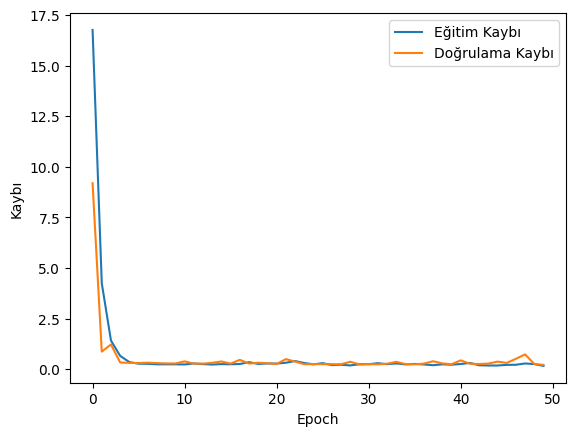

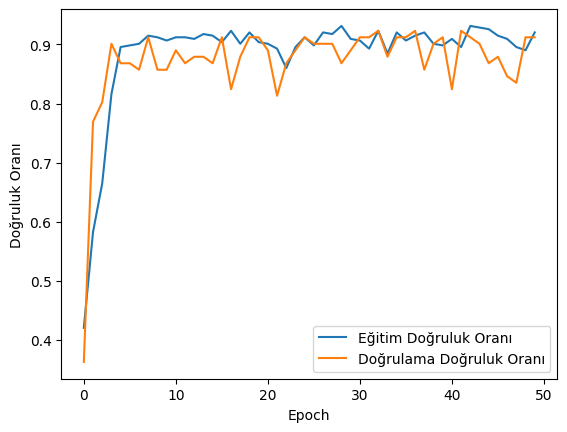

<ipython-input-17-c58bb5098496>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


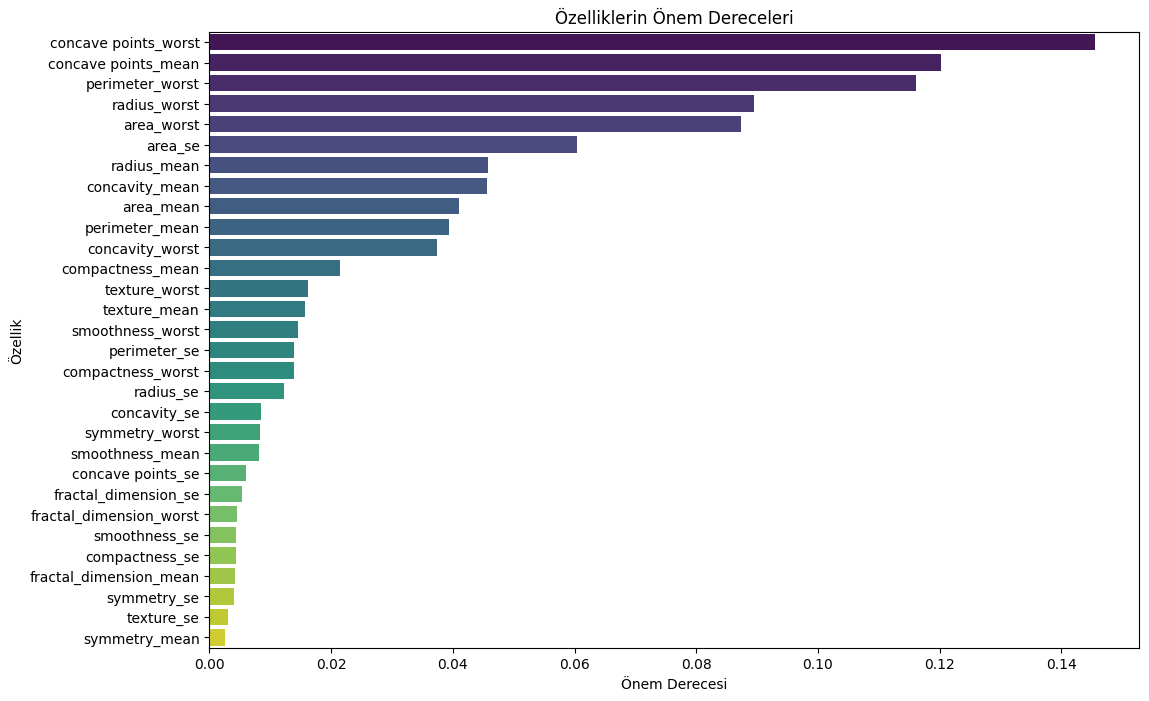

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Modeli oluştur
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Test seti ile değerlendir
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Doğruluk Oranı: {accuracy}")

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Eğitim Doğruluk Oranı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluk Oranı')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk Oranı')
plt.legend()
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Özelliklerin önem derecelerini görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Özelliklerin Önem Dereceleri')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.show()


